In [1]:
!pip install nltk spacy scikit-learn pandas numpy seaborn matplotlib gensim
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 98.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string


In [3]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ls "/content/drive/MyDrive"

 asmr
'Colab Notebooks'
 datasets
'extract both inputs and outputs from this file fr....gsheet'
'extract everything written in slides from start t....gsheet'
'Greyscale Datasets'
'group 3 (1).gdoc'
'group 3.gdoc'
'Groups for Assembly Language (1).gsheet'
'Groups for Assembly Language.gsheet'
 LicensePlates.v2i.yolov8.zip
'Machine Learning'
 MASK
'NLP PROJECT.docx'
 test
 train
'Untitled document.gdoc'
 valid


In [11]:
!ls "/content/drive/MyDrive/Greyscale Datasets"


'archive (3)'			     'Kannada Mnist.zip'
'Brain Tumor Detection Dataset.zip'   LicensePlates.v2i.yolov8
'Cat Identification.v3i.yolov8'      'Retina Dataset.zip'
'Cats vs Dogs Dataset.zip'	     'Sign Mnist.zip'
'Fashion Mnist Dataset.zip'


In [18]:
!ls "/content/drive/MyDrive/Greyscale Datasets/archive (3)"

Fake.csv  True.csv


In [19]:
import pandas as pd

fake = pd.read_csv("/content/drive/MyDrive/Greyscale Datasets/archive (3)/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/Greyscale Datasets/archive (3)/True.csv")

fake.head(), true.head()

(                                               title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  
 0  December 31, 2017  
 1  December 31, 2017  
 2  December 30, 2017  
 3  December 29, 2017  
 4  December 25, 2017  ,
                                                title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U

In [23]:
# Add labels
fake['label'] = 0   # Fake news
true['label'] = 1   # Real news


In [24]:
df = pd.concat([fake, true], axis=0)

In [25]:
df = df[['text', 'label']]

In [26]:
df = df.sample(frac=1).reset_index(drop=True)


In [29]:
df.head()


,text,label
0,WASHINGTON (Reuters) - U.S. Republican Senator...,1
1,The left showed its true colors last night wit...,0
2,WASHINGTON (Reuters) - President Barack Obama ...,1
3,"AH LEI THAN KYAW, Myanmar (Reuters) - Some 1,0...",1
4,Patrick Stewart despises Donald Trump so much ...,0


In [30]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
    text = re.sub(r'<.*?>', '', text)           # remove HTML tags
    text = re.sub(r'\d+', '', text)             # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # punctuation
    return text
df['clean_text'] = df['text'].apply(clean_text)


In [31]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


In [33]:
def preprocess(text):
    tokens = word_tokenize(text)                        # Tokenizing
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]      # Lemmatize
    return " ".join(tokens)
df['processed_text'] = df['clean_text'].apply(preprocess)


In [34]:
X = df['processed_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [35]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [36]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=2000)

Accuracy: 0.9857461024498887
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4723
           1       0.98      0.99      0.99      4257

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



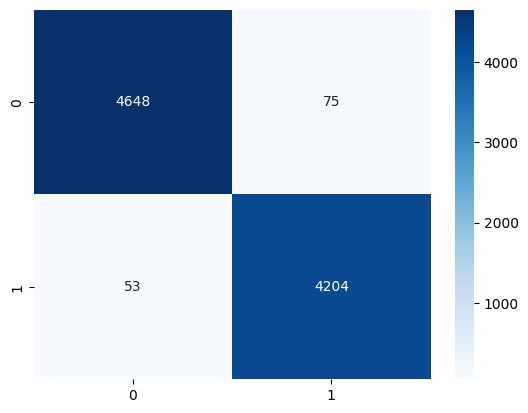

In [37]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [38]:
def predict_news(text):
    cleaned = clean_text(text)
    processed = preprocess(cleaned)
    vector = tfidf.transform([processed])
    pred = model.predict(vector)[0]
    return "REAL NEWS" if pred == 1 else "FAKE NEWS"

In [39]:
import pickle

pickle.dump(model, open("fake_news_model.pkl", "wb"))
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))